In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset analysis
Given that in the future training our model with the whole dataset might not be a great idea, I decided to create a separated dataset just for the analysis of the data as a whole and then, eventually creating a smaller dataset to be used for training.

In [4]:
test_data = pd.read_csv('data/test_v2.csv')
train_data = pd.read_csv('data/train_v2.csv')

In [5]:
test_data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8059443 entries, 0 to 8059442
Data columns (total 15 columns):
id                    8059443 non-null int64
timestamp             8059443 non-null int64
product_id            8059443 non-null object
product_department    8059443 non-null object
product_category      8059443 non-null object
card_id               8059443 non-null object
user_id               8059443 non-null object
C15                   8059443 non-null int64
C16                   8059443 non-null int64
C17                   8059443 non-null int64
C18                   8059443 non-null int64
C19                   8059443 non-null int64
C20                   8059443 non-null int64
C21                   8059443 non-null int64
amount                8059443 non-null float64
dtypes: float64(1), int64(9), object(5)
memory usage: 922.3+ MB


In [6]:
print(train_data.info(null_counts = True))
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32369524 entries, 0 to 32369523
Data columns (total 16 columns):
id                    32369524 non-null int64
timestamp             32369524 non-null int64
product_id            32369524 non-null object
product_department    32369524 non-null object
product_category      32369524 non-null object
card_id               32369524 non-null object
user_id               32369524 non-null object
C15                   32369524 non-null int64
C16                   32369524 non-null int64
C17                   32369524 non-null int64
C18                   32369524 non-null int64
C19                   32369524 non-null int64
C20                   32369524 non-null int64
C21                   32369524 non-null int64
amount                32369524 non-null float64
isfraud               32369524 non-null int64
dtypes: float64(1), int64(10), object(5)
memory usage: 3.9+ GB
None


,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
0,0,1413851531856,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,0,35,-1,79,184.09,0
1,1,1413851817483,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,0,35,100084,79,184.09,0
2,2,1413852597526,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,0,35,100084,79,184.09,0
3,3,1413851283020,f3845767,1fbe01fe,28905ebd,ecad2386,a99f214a,320,50,1722,0,35,100084,79,184.09,0
4,4,1413849935779,9166c161,fe8cc448,0569f928,ecad2386,a99f214a,320,50,2161,0,35,-1,157,196.98,0


There are null values in neither of the dataset, however, the are clearly values which are ***imputed to -1*** as stated in Kaggle. These were probably nulls.

In [32]:
print("Train: ")
fraud_counts = train_data['isfraud'].value_counts()
print(fraud_counts)
print(fraud_counts / train_data.shape[0])

Train: 
0    26819827
1     5549697
Name: isfraud, dtype: int64
0    0.828552
1    0.171448
Name: isfraud, dtype: float64


17% of the entries in the data are fraudulent.

## Timestamp
Let's convert the timestamp to a datetime instance so that we can analyze it better

In [33]:
from datetime import datetime

def fromTimestampToDatetime(array): return [datetime.utcfromtimestamp(int(ts) / 1000) for ts in array]

test_data['datetime'] = fromTimestampToDatetime(test_data['timestamp'])
train_data['datetime'] = fromTimestampToDatetime(train_data['timestamp'])

In [36]:
train_datetime = train_data['datetime']
print("Train:\nmin: ", train_datetime.min(), "\nmax: ", train_datetime.max())
test_datetime = test_data['datetime']
print("Test:\nmin: ", test_datetime.min(), "\nmax: ", test_datetime.max())

Train:
min:  2014-10-21 00:00:00.004000 
max:  2014-10-28 23:55:45.717000
Test:
min:  2014-10-28 23:55:45.846000 
max:  2014-10-30 23:59:59.999000


The difference between the test and train data is the timestamp. Train data collection was completely interrupted and test data started being collected a little after.

## Histograms
Let's create histograms of the attributes that would make sense.

In [42]:
train_hist = train_data[['C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'amount']]

[]

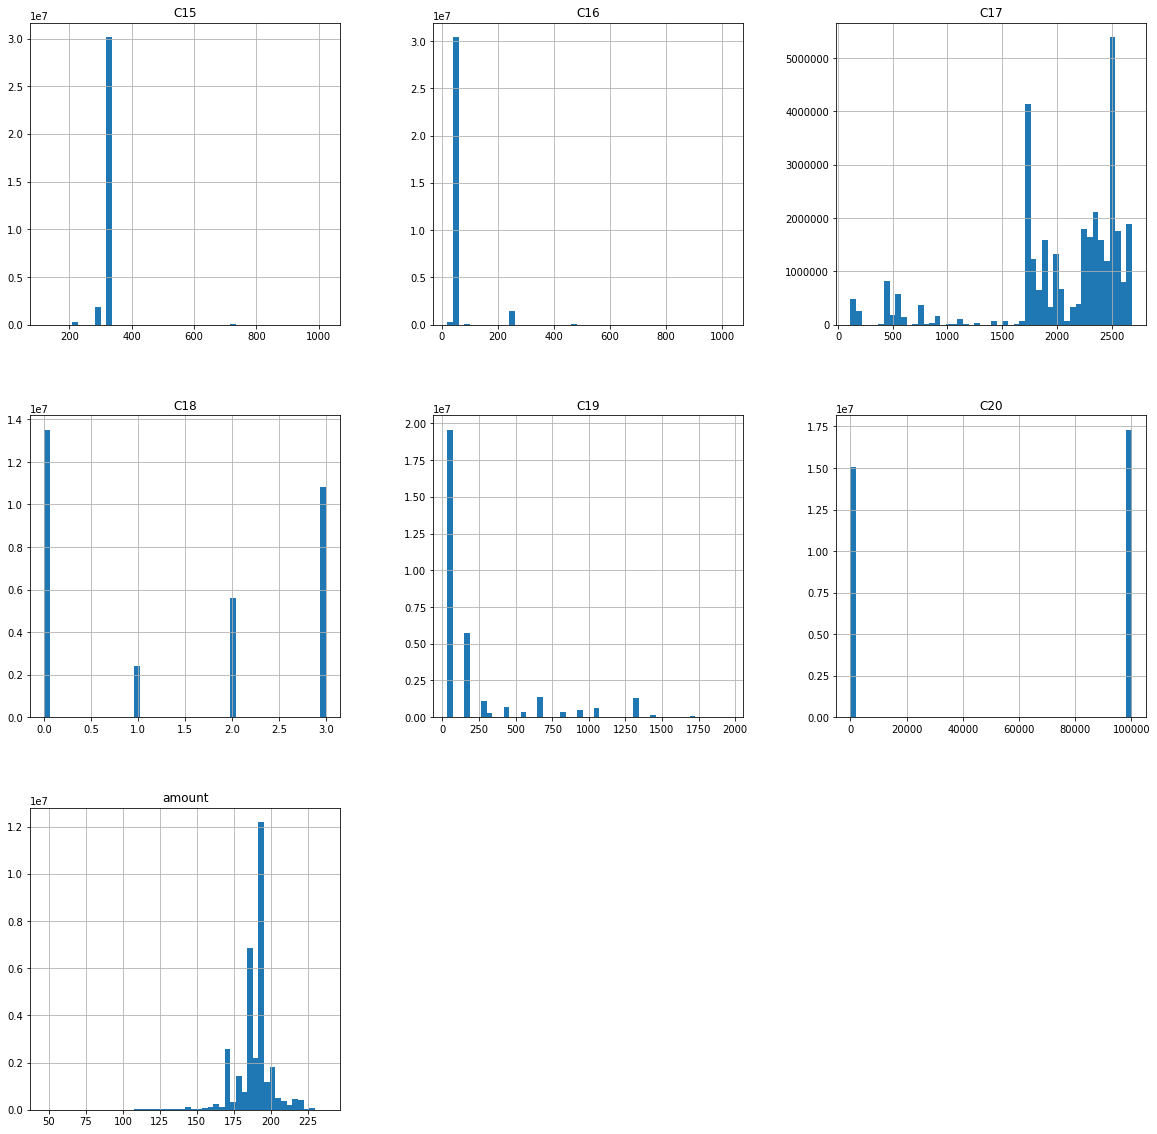

In [46]:
train_hist.hist(bins = 50, figsize=(20,20))
plt.plot()

In [52]:
train_data['C20'].value_counts()

-1         15059166
 100084     2033777
 100111     1448778
 100148     1374808
 100077     1306586
 100075     1268444
 100081     1094680
 100083      898843
 100156      851291
 100193      624097
 100074      474919
 100079      459705
 100189      415783
 100176      374786
 100076      350827
 100192      207193
 100191      200965
 100190      191930
 100031      183560
 100188      170141
 100181      131385
 100155      125255
 100013      116304
 100194      115471
 100003      106246
 100000      103649
 100182      101721
 100105       95718
 100119       95310
 100233       84921
             ...   
 100244        1132
 100043        1072
 100163        1022
 100010         852
 100024         737
 100109         610
 100108         573
 100122         492
 100213         471
 100082         461
 100178         366
 100137         358
 100153         357
 100175         145
 100169         117
 100098         103
 100138          79
 100100          73
 100078          39


In [53]:
test_data['C20'].value_counts()

-1         3878752
 100148     420082
 100084     404701
 100075     277970
 100176     274693
 100077     268909
 100111     267955
 100081     242353
 100156     181267
 100083     174724
 100079     118501
 100074     112536
 100076     107068
 100170     101438
 100193      83424
 100013      81806
 100189      60950
 100188      50358
 100177      43073
 100171      38335
 100155      36463
 100000      36331
 100190      33735
 100233      33647
 100194      31453
 100199      30504
 100192      27592
 100200      27309
 100221      22660
 100191      22386
            ...   
 100054        301
 100213        297
 100043        290
 100012        248
 100122        199
 100099        178
 100229        173
 100082        169
 100215        168
 100010        151
 100137        149
 100244        135
 100109        119
 100153        115
 100024         88
 100163         83
 100056         65
 100175         51
 100138         23
 100098         17
 100108         16
 100100     

`C20` has clearly a lot of imputed values as -1.